In [1]:
#Decision Tree

In [2]:
# Importing the libraries

In [3]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
#Importing the dataset

In [5]:
# Importing the train_set
train_dataset = pd.read_csv('S11_trainset_P135_70.csv')
X_train = train_dataset.iloc[:, :-1].values
y_train = train_dataset.iloc[:, -1].values

In [6]:
# Importing the test_set
test_dataset = pd.read_csv('S11_testset_P12345_30.csv')
X_test = test_dataset.iloc[:, :-1].values
y_test = test_dataset.iloc[:, -1].values

In [7]:
#Feature Scaling

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
#Dataset Analysis

In [10]:
#Training Set

In [11]:
print(X_train)

[[-1.43326266 -1.26507519 -0.90008675 ...  0.44118127 -1.8010007
  -1.43829061]
 [-1.44040247 -1.21630081 -0.98510071 ...  0.40343083 -2.221277
  -0.28863125]
 [-1.43489779 -1.15128777 -1.02908836 ...  0.37463345 -1.49660612
  -0.30440131]
 ...
 [ 2.07198819  1.94838413  1.68090364 ... -0.59124154 -1.02788849
  -1.78618436]
 [ 2.09979519  1.74381059  2.01441561 ... -1.0473856  -0.88856439
  -1.79717507]
 [ 2.10695401  1.86846556  1.54508316 ... -1.89897944 -1.04798522
  -1.73708396]]


In [12]:
np.shape(X_train)

(19775, 42)

In [13]:
print(y_train)

[1 1 1 ... 8 8 8]


In [14]:
np.shape(y_train)

(19775,)

In [15]:
#Test Set

In [16]:
print(X_test)

[[-0.99941796 -1.16961593 -0.88441106 ...  0.36434032 -1.3818566
  -0.11557687]
 [-1.41262652 -1.19983127 -0.9681693  ...  0.41747506 -1.55107197
  -1.11668721]
 [-1.48971104 -1.26202142 -1.04290291 ...  0.44069898 -1.65550309
  -1.25764562]
 ...
 [ 2.45412583  1.80876812  1.68319052 ... -1.18075782 -1.18838277
  -1.17617009]
 [ 2.03922737  1.73344288  2.02560976 ... -1.54430454 -2.11379986
  -1.62503721]
 [ 2.08489942  1.94368976  1.91574592 ... -0.64980101 -1.24095979
  -1.73119061]]


In [17]:
np.shape(X_test)

(7039, 42)

In [18]:
print(y_test)

[1 1 1 ... 8 8 8]


In [19]:
np.shape(y_test)

(7039,)

In [20]:
#Model Tuning

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# Set the parameters by cross-validation
tuned_parameters = [{"criterion":["gini","entropy"],
                     "splitter":["best","random"],
                     "max_depth":[10,100,500,1000,50000,10000],
                    "min_samples_split": [2,5,10,15,25,40] ,
                     "min_samples_leaf":[1,2,5,10,20]}]
             

print("# Tuning hyper-parameters for Decision Tree Classifier")
print()

clf = GridSearchCV(DecisionTreeClassifier(random_state=0), tuned_parameters, scoring='accuracy', cv = 5)

clf.fit(X_train, y_train)

print("Best parameters set found on training set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

# Tuning hyper-parameters for Decision Tree Classifier

Best parameters set found on training set:

{'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}

Grid scores on training set:

0.944 (+/-0.083) for {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.961 (+/-0.033) for {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.941 (+/-0.087) for {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.954 (+/-0.039) for {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
0.944 (+/-0.076) for {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
0.933 (+/-0.090) for {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 

In [21]:
#Training the Model

In [22]:
from sklearn.tree import DecisionTreeClassifier
# Training the Decision Tree classfication model on the Training set
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 100, min_samples_leaf=2, min_samples_split=2, 
                                       splitter = 'random', random_state= 0)
# fitting the model
classifier_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='random')

In [23]:
#Prediction of test set results

In [24]:
# Predicting the Test set results
y_results_dt = classifier_dt.predict(X_test)

In [25]:
#accuracy_score, f1_score, recall_score,precision_score metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score
#accuracy
accuracy_dt = accuracy_score(y_test, y_results_dt)
print("accuracy:{}".format(accuracy_dt))
#F1 score    
f1_score_dt = f1_score(y_test, y_results_dt, average='micro')
print("f1_score:{}".format(f1_score_dt))
#Recall score
recall_score_dt = recall_score(y_test, y_results_dt, average='micro')
print("recall_score:{}".format(recall_score_dt))
#Precision score
precision_score_dt = precision_score(y_test, y_results_dt, average='micro')
print("precision_score:{}".format(precision_score_dt))

accuracy:0.9251314107117489
f1_score:0.9251314107117489
recall_score:0.9251314107117489
precision_score:0.9251314107117489


In [26]:
#Classification report
from sklearn import metrics
print(metrics.classification_report(y_test, y_results_dt, digits = 8))

              precision    recall  f1-score   support

           1  0.87103378 0.96049661 0.91358025       886
           2  0.95528899 0.99207248 0.97333333       883
           3  0.91267943 0.86902050 0.89031505       878
           4  0.86731001 0.80877390 0.83701979       889
           5  0.98631699 0.97081930 0.97850679       891
           6  0.86196319 0.96563574 0.91085900       873
           7  0.96446701 0.86363636 0.91127098       880
           8  0.99761051 0.97206054 0.98466981       859

    accuracy                      0.92513141      7039
   macro avg  0.92708374 0.92531443 0.92494438      7039
weighted avg  0.92692257 0.92513141 0.92477226      7039



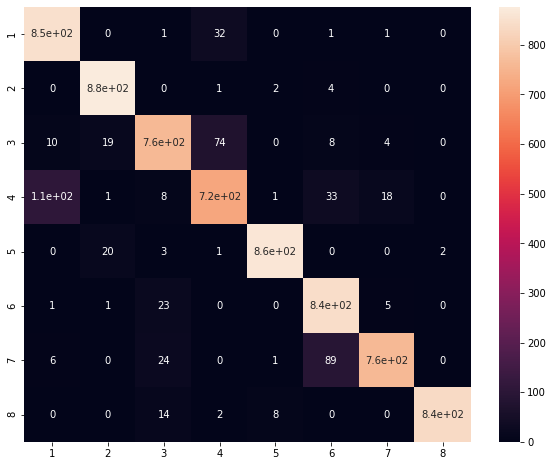

In [27]:
#Model Evalation For Logistic Regression Classification Model
from sklearn.metrics import confusion_matrix
    
#confusion matrix

cm_dt = confusion_matrix(y_test, y_results_dt)
array = cm_dt 
df_cm = pd.DataFrame(array, index = [i for i in "12345678"],
                  columns = [i for i in "12345678"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)

In [28]:
df_cm

,1,2,3,4,5,6,7,8
1,851,0,1,32,0,1,1,0
2,0,876,0,1,2,4,0,0
3,10,19,763,74,0,8,4,0
4,109,1,8,719,1,33,18,0
5,0,20,3,1,865,0,0,2
6,1,1,23,0,0,843,5,0
7,6,0,24,0,1,89,760,0
8,0,0,14,2,8,0,0,835


In [29]:
sum = 0
for i in range(0,8,1):
     sum += df_cm.iloc[i][i]
print("number of correctly classified samples in the test set: {}".format(sum))   

number of correctly classified samples in the test set: 6512


In [30]:
import matplotlib.pyplot as plt
from itertools import cycle
from numpy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the output
y_test = label_binarize(y_test, classes=[ 1, 2, 3, 4, 5, 6, 7, 8])
n_classes = y_test.shape[1]

# Learn to predict each class against the other
y_score = y_results_dt
y_score = label_binarize(y_score, classes=[ 1, 2, 3, 4, 5, 6, 7, 8])


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [31]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

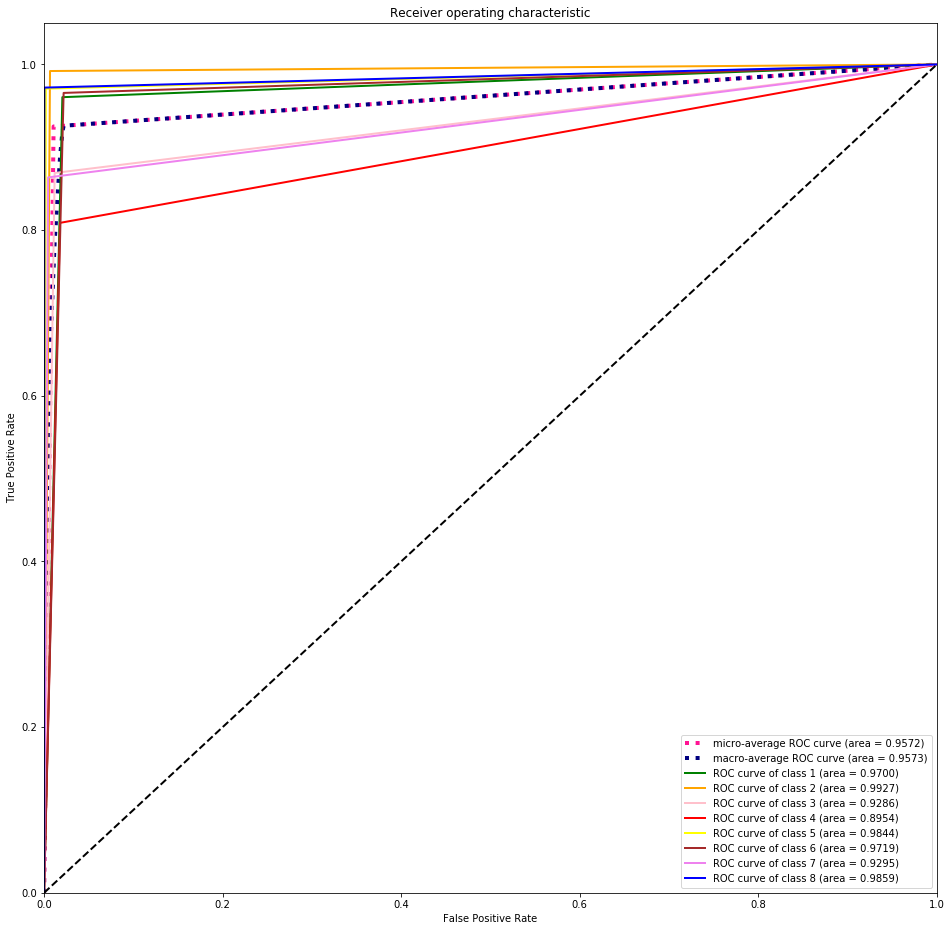

In [38]:
# Plot all ROC curves
plt.figure(figsize = (16,16))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'orange','pink','red','yellow','brown','violet','blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i+1 , roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw = 2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [36]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.4f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.8652


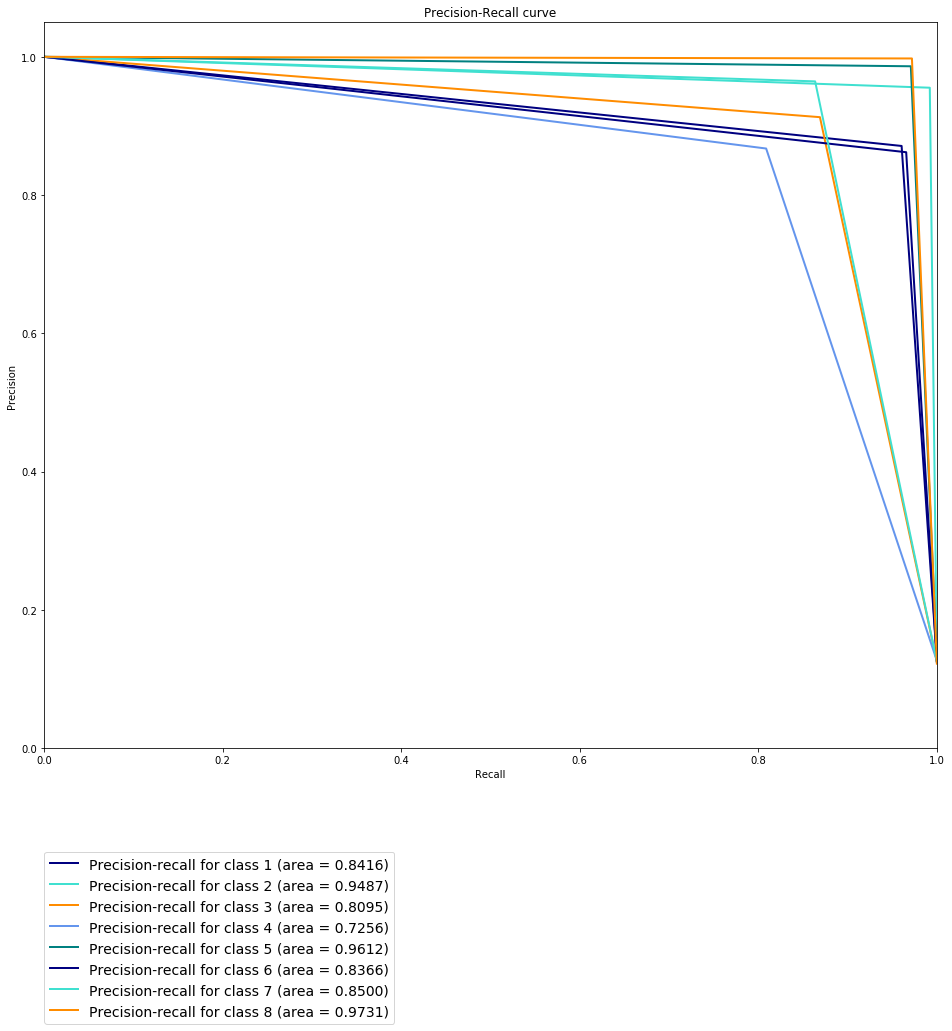

In [37]:
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(16,16))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.4f})'
                  ''.format(i+1, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()